<a href="https://colab.research.google.com/github/Samuela31/Data-Mining-and-Analysis-Laboratory/blob/main/Data_mining_lab_5_Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['A', 'D', 'C', 'B', 'E']
Empty DataFrame
Columns: [A, D, C, B, E]
Index: []
   A  D  C  B  E
0  1  0  0  1  0
1  0  1  0  1  0
2  0  0  1  1  0
3  1  1  0  1  0
4  1  0  1  0  0
5  0  0  1  1  0
6  1  0  1  0  0
7  1  0  1  1  1
8  1  0  1  1  0


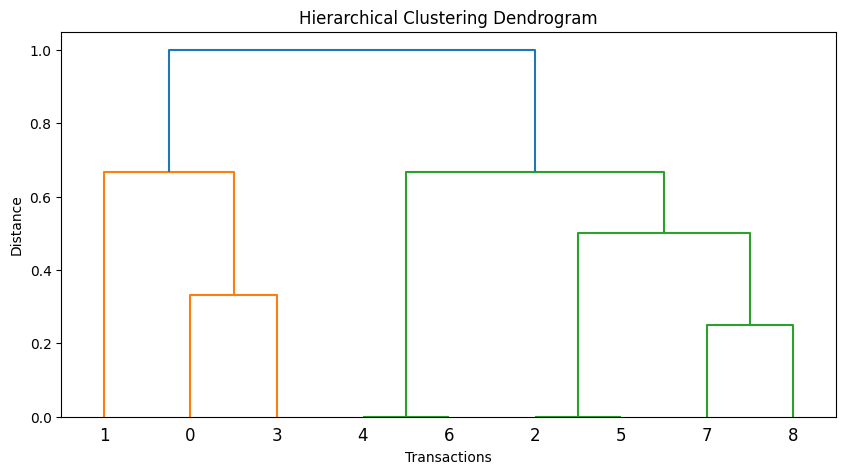

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('apri.csv')

#Create a list of unique items in the dataset (set is used to prevent duplicate item, TID is ignored)
unique_items = list(set(item for sublist in df['ITEMSETS'].str.split(', ') for item in sublist))
print(unique_items)

#Create a one-hot encoded DataFrame
oht = pd.DataFrame(columns=unique_items)
print(oht)

for index, row in df.iterrows():
    itemset = row['ITEMSETS'].split(', ')
    oht.loc[index, itemset] = 1

oht.fillna(0, inplace=True)
print(oht)

# Assuming 'data' is your binary matrix
linkage_matrix = linkage(oht, method='complete', metric='jaccard')

# Create a dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=oht.index, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Transactions')
plt.ylabel('Distance')
plt.show()
